# UNSUPERVISED LEARNING -

- Unsupervised learning is where you only have input data (X) and no corresponding output variables.

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

Unsupervised learning problems can be further grouped into clustering and association problems.

### Clustering: 

A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.

### Association:

An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

Some popular examples of unsupervised learning algorithms are:

k-means for clustering problems.
Apriori algorithm for association rule learning problems.

 The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization
 
 http://scikit-learn.org/stable/unsupervised_learning.html#unsupervised-learning
 

http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html

KMean Algorithm:

- Random draw cluster center
- Optizme
- Assign n move the centroid

KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

- n_cluster and max_iter is a important parameters

- The k-means problem is solved using Lloyd’s algorithm.

- The average complexity is given by O(k n T), were n is the number of samples and T is the number of iteration.

- The worst case complexity is given by O(n^(k+2/p)) with n = n_samples, p = n_features. (D. Arthur and S. Vassilvitskii, ‘How slow is the k-means method?’ SoCG2006)

- In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

The results of the K-means clustering algorithm are:

1. The centroids of the K clusters, which can be used to label new data

2. Labels for the training data (each data point is assigned to a single cluster)

https://www.datascience.com/blog/introduction-to-k-means-clustering-algorithm-learn-data-science-tutorials


C:\Users\Sandheep\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    0  29.0000      0      0     738  211.3375    159   
1       1         1    1   0.9167      1      2     515  151.5500     10   
2       1         0    0   2.0000      1      2     515  151.5500     10   
3       1         0    1  30.0000      1      2     515  151.5500     10   
4       1         0    0  25.0000      1      2     515  151.5500     10   

   embarked  boat  home.dest  
0         2     1        336  
1         2    21        316  
2         2     8        316  
3         2     8        316  
4         2     8        316  

[1 1 0 ..., 0 0 0]
0.3200916730328495


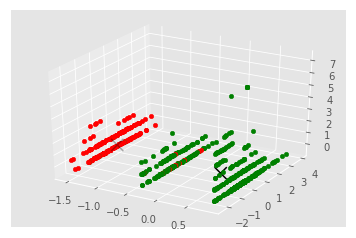

In [4]:
''' Kmean algorithm for titanic dataset with 2 cluster survial or not 
    Here we handle non-numeric data and convert it into numbers 
    
    Flat clustering 
    
'''


#https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

df = pd.read_excel('titanic.xls')
#print(df.head())
df.drop(['body','name'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
x = df["age"].mean()
df.fillna(x, inplace=True)
#print(df.head())

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            #print(unique_elements)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    #print(text_digit_vals)
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
print(df.head())


df.drop(['sex','boat'], 1, inplace=True)
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
#print(X)
y = np.array(df['survived'])
print()
print(y)

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    #print(predict_me)
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))
labels = clf.labels_
cluster_centers = clf.cluster_centers_
colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()



# Mean Shift :

Mean shift is a hierarchical clustering where n_clusters need not to be mentioned.

Mean shift is a non-parametric feature-space analysis technique, a so-called mode seeking algorithm. It is a procedure for locating the maxima of a density function given discrete data sampled from that function. In a sense, it is using a non-parametric density gradient estimation. It is useful for detecting the modes of this density.

http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_mean_shift_tracking_segmentation.php

refer for pros and cons

Now, with the above, this is the Meanshift algorithm for a set of datapoints X:

- For each datapoint x ∈ X, find the neighbouring points N(x) of x.
- For each datapoint x ∈ X, calculate the mean shift m(x) from this equation: meanshift formula 1
- For each datapoint x ∈ X, update x ← m(x).
- Repeat 1. for n_iteations or until the points are almost not moving or not moving.

### K-Means VS Meanshift

- K-Means is faster in terms of runtime complexity!

- The key difference is that Meanshift does not require the user to specify the number of clusters. In some cases, it is not straightforward to guess the right number of clusters to use. In K-Means, the output may end up having too few clusters or too many clusters to be useful. At the cost of larger time complexity, Meanshift determines the number of clusters suitable to the dataset provided.

- Another commonly cited difference is that K-Means can only learn circle or ellipsoidal clusters. However, this is not true. The reason that Meanshift can learn arbitrary shapes is because the features are mapped to another higher dimensional feature space through the kernel. The arbitrary shapes are due to the algorithm finding circle or ellipsoidal clusters in higher dimensional feature space. When the features are mapped back to 1D/2D/3D, the resulting clusters look like strange shapes. This is also the trick as used in Support Vector Machines.


- To use meanshift in OpenCV, first we need to setup the target, find its histogram so that we can backproject the target on each frame for calculation of meanshift. We also need to provide initial location of window. For histogram, only Hue is considered here. Also, to avoid false values due to low light, low light values are discarded using cv2.inRange() function.




In [19]:
# http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_meanshift/py_meanshift.html

import numpy as np
import cv2

cap = cv2.VideoCapture('slow_traffic_small.flv')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

ModuleNotFoundError: No module named 'cv2'

In [20]:
!pip install cv2

  Could not find a version that satisfies the requirement cv2 (from versions: )
No matching distribution found for cv2
